In [ ]:
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

# Project 1 

# 1. Set up the data, exploring the data.

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load Dataset ('AviationData.csv')

In [ ]:
Qdf = pd.read_csv('./data/Aviation_Data.csv')

/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
Qdf.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
Qdf.shape

(90348, 31)

In [ ]:
Qdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

There seem like big portions of missing values in Latitude, Longitude, Airport code, Airport name, aircraft. categories, FAR. Description, Schedule, Air carrier, broad.phase.of.flight.

The datatypes are objects and floats.

# Looking into models and makes in the crashes

Data Cleaning

In [ ]:
Qdf['Make'].value_counts()

Cessna                            22227
Piper                             12029
CESSNA                             4922
Beech                              4330
PIPER                              2841
Bell                               2134
Boeing                             1594
BOEING                             1151
Grumman                            1094
Mooney                             1092
BEECH                              1042
Robinson                            946
Bellanca                            886
Hughes                              795
Schweizer                           629
Air Tractor                         595
BELL                                588
Mcdonnell Douglas                   526
Aeronca                             487
Maule                               445
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342


It seems like there is a lot of cleaning we have to do.
Cessna, CESSNA are the same make. 
Same for BOEING nad Boeing.BEECH and Beech, Aero Vodochody Aero Works and Aero Vodochody Aero. Works.
Aerofab Inc. and Aerofab, Inc.
Piper and PIPER.
BELL and Bell.


Aerostar International                
Aerostar International Inc            
Aerostar International Inc.           
Aerostar International, Inc.          
Air Tractor                         
Air Tractor Inc                       
Air Tractor Inc.                      
Air Tractor, Inc.                     
Airbus Industrie                   
Airbus Industries                     
Grumman                           
Grumman American                  
... more



Clean the NaNs

In [ ]:
90348-88826

1522

In [ ]:
1522/90348

0.016845973347500775

I am planning to drop the NaNs. They are only 1.7% of the values.

In [ ]:
Qdf1 = Qdf.dropna(subset=['Make']) # drop the NaNs

In [ ]:
Qdf1['Make'].isna().sum()

0

In [ ]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].str.strip().str.upper()

In [ ]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({
    "AEROSTAR INTERNATIONAL INC": "AEROSTAR INTERNATIONAL",
    "AEROSTAR INTERNATIONAL INC.": "AEROSTAR INTERNATIONAL",
    "AEROSTAR INTERNATIONAL, INC.": "AEROSTAR INTERNATIONAL"})

In [ ]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({
    "AMERICAN CHAMPION (ACAC)": "AMERICAN CHAMPION",
    "AMERICAN CHAMPION AIRCRAFT": "AMERICAN CHAMPION",
    "AMERICAN CHAMPION AIRCRAFT COR": "AMERICAN CHAMPION"})

In [ ]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({
    "AMERICAN LEGAND AIRCRAFT": "AMERICAN LEGEND",
    "AMERICAN LEGEND AIRCRAFT CO": "AMERICAN LEGEND",
    "AMERICAN LEGEND AIRCRAFT CO.": "AMERICAN LEGEND",
    "AMERICAN LEGEND AIRCRAFT COMPA": "AMERICAN LEGEND"})

In [ ]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({
    "FIREFLY BALLOON, INC.": "FIREFLY",
    "FIREFLY BALLOONS": "FIREFLY",
    "FIREFLY BALLOONS 2010 INC": "FIREFLY",
    "FIREFLY BALLOONS INC": "FIREFLY",
    "FIREFLY BALLOONS, INC": "FIREFLY"})

In [ ]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({
    "AIR TRACTOR INC": "AIR TRACTOR",
    "AIR TRACTOR INC.": "AIR TRACTOR",
    "AIR TRACTOR, INC.": "AIR TRACTOR"})

In [ ]:
Qdf1['Make'].value_counts()

CESSNA                            27149
PIPER                             14870
BEECH                              5372
BOEING                             2745
BELL                               2722
MOONEY                             1334
ROBINSON                           1230
GRUMMAN                            1172
BELLANCA                           1045
HUGHES                              932
AIR TRACTOR                         918
SCHWEIZER                           773
AERONCA                             636
MCDONNELL DOUGLAS                   608
MAULE                               589
CHAMPION                            519
STINSON                             439
AERO COMMANDER                      429
DE HAVILLAND                        422
LUSCOMBE                            414
AEROSPATIALE                        388
TAYLORCRAFT                         383
NORTH AMERICAN                      383
ROCKWELL                            355
HILLER                              348


Seems like I can pull out the top 15 makes now,even there are still some naming issues.

In [ ]:
Qdf1['Make'].value_counts()[:15]

CESSNA               27149
PIPER                14870
BEECH                 5372
BOEING                2745
BELL                  2722
MOONEY                1334
ROBINSON              1230
GRUMMAN               1172
BELLANCA              1045
HUGHES                 932
AIR TRACTOR            918
SCHWEIZER              773
AERONCA                636
MCDONNELL DOUGLAS      608
MAULE                  589
Name: Make, dtype: int64

In [ ]:
Top_15_Makes = list (Qdf1['Make'].value_counts()[:15].index)

In [ ]:
Top_15_Makes_Crash_Counts = list (Qdf1['Make'].value_counts()[:15].values)
Top_15_Makes_Crash_Counts

[27149,
 14870,
 5372,
 2745,
 2722,
 1334,
 1230,
 1172,
 1045,
 932,
 918,
 773,
 636,
 608,
 589]

Text(0.5, 1.0, 'Top 15 Makes in Crashes')

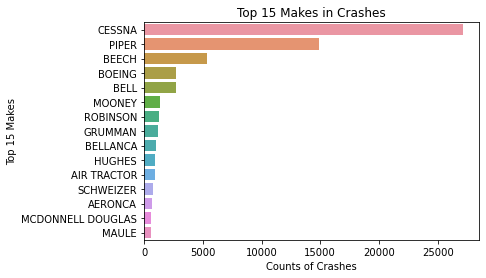

In [ ]:
fig,ax = plt.subplots()
sns.barplot(x=Top_15_Makes_Crash_Counts,y=Top_15_Makes,ax=ax)
ax.set_xlabel('Counts of Crashes')
ax.set_ylabel('Top 15 Makes')
ax.set_title('Top 15 Makes in Crashes')

Explore the models within of the top 15 makes

In [ ]:
Qdf1[['Make','Model']].value_counts() # this gives with both make and model, counts of crashes from high to low.

Make                            Model               
CESSNA                          152                     2366
                                172                     1753
                                172N                    1163
PIPER                           PA-28-140                932
CESSNA                          150                      829
                                172M                     798
                                172P                     689
                                182                      659
                                180                      621
                                150M                     585
PIPER                           PA-18                    578
                                PA-28-180                572
                                PA-18-150                571
                                PA-28-161                565
                                PA-28-181                529
BELL                            

In [ ]:
Qdf1[['Make','Model']].value_counts()[:50]

Make      Model     
CESSNA    152           2366
          172           1753
          172N          1163
PIPER     PA-28-140      932
CESSNA    150            829
          172M           798
          172P           689
          182            659
          180            621
          150M           585
PIPER     PA-18          578
          PA-28-180      572
          PA-18-150      571
          PA-28-161      565
          PA-28-181      529
BELL      206B           516
BOEING    737            489
PIPER     PA-38-112      468
CESSNA    150L           460
BEECH     A36            419
CESSNA    140            401
          170B           389
          172S           371
GRUMMAN   G-164A         365
PIPER     PA-32-300      356
CESSNA    182P           355
PIPER     PA-24-250      352
          PA-28R-200     334
          PA-12          324
CESSNA    A188B          318
PIPER     PA-23-250      311
CESSNA    177            296
MOONEY    M20J           287
CESSNA    A185F       

Make a new column 'Make_and_Model' to combine make and model

In [ ]:
Qdf1['Make_and_Model'] = Qdf1['Make']+str(' ')+Qdf1['Model']

<ipython-input-109-25e63f9d8566>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Make_and_Model'] = df1['Make']+str(' ')+df1['Model']


In [ ]:
Qdf1['Make_and_Model'].head()

0     STINSON 108-3
1    PIPER PA24-180
2       CESSNA 172M
3      ROCKWELL 112
4        CESSNA 501
Name: Make_and_Model, dtype: object

In [ ]:
Qdf1['Make_and_Model'].value_counts()

CESSNA 152                                            2366
CESSNA 172                                            1753
CESSNA 172N                                           1163
PIPER PA-28-140                                        932
CESSNA 150                                             829
CESSNA 172M                                            798
CESSNA 172P                                            689
CESSNA 182                                             659
CESSNA 180                                             621
CESSNA 150M                                            585
PIPER PA-18                                            578
PIPER PA-28-180                                        572
PIPER PA-18-150                                        571
PIPER PA-28-161                                        565
PIPER PA-28-181                                        529
BELL 206B                                              516
BOEING 737                                             4

In [ ]:
top_50_make_and_model_crashes= Qdf1['Make_and_Model'].value_counts()[:50]

In [ ]:
top_50_make_and_model_crashes

CESSNA 152          2366
CESSNA 172          1753
CESSNA 172N         1163
PIPER PA-28-140      932
CESSNA 150           829
CESSNA 172M          798
CESSNA 172P          689
CESSNA 182           659
CESSNA 180           621
CESSNA 150M          585
PIPER PA-18          578
PIPER PA-28-180      572
PIPER PA-18-150      571
PIPER PA-28-161      565
PIPER PA-28-181      529
BELL 206B            516
BOEING 737           489
PIPER PA-38-112      468
CESSNA 150L          460
BEECH A36            419
CESSNA 140           401
CESSNA 170B          389
CESSNA 172S          371
GRUMMAN G-164A       365
PIPER PA-32-300      356
CESSNA 182P          355
PIPER PA-24-250      352
PIPER PA-28R-200     334
PIPER PA-12          324
CESSNA A188B         318
PIPER PA-23-250      311
CESSNA 177           296
MOONEY M20J          287
CESSNA A185F         285
PIPER PA-22-150      281
PIPER PA-31-350      280
CESSNA 185           279
PIPER PA28           279
AERONCA 7AC          271
ROBINSON R44         267


In [ ]:
top_50_make_and_model =list(top_50_make_and_model_crashes.index)

In [ ]:
top_50_make_and_model_crashes =list(top_50_make_and_model_crashes.values)

Text(0.5, 1.0, 'Top 50 Makes and Models in Crashes')

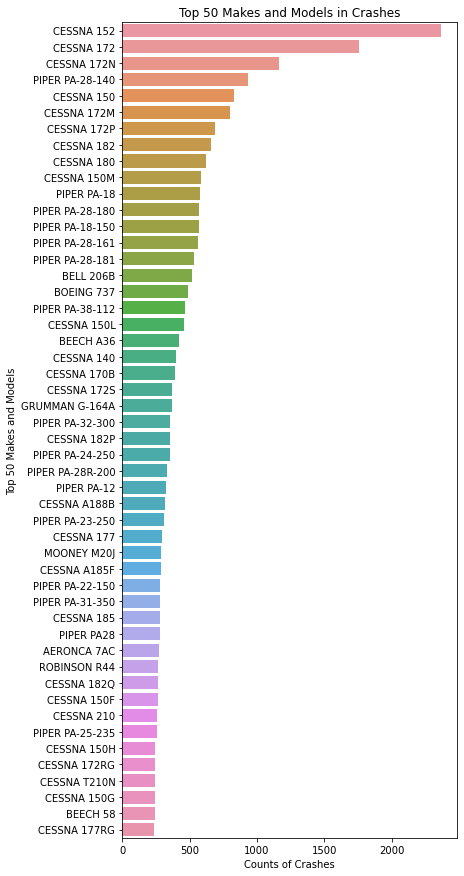

In [ ]:
fig, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x=top_50_make_and_model_crashes,y=top_50_make_and_model, ax=ax)
ax.set_xlabel('Counts of Crashes')
ax.set_ylabel('Top 50 Makes and Models')
ax.set_title('Top 50 Makes and Models in Crashes')


# Looking into Weather Conditions and Crashes

In [ ]:
Qdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [ ]:
(90348-84397)/90348

0.0658675344224554

6.6% data points are NaN in weather Condition column.. Let's see what should we do with them...

In [ ]:
Qdf['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

In [ ]:
#UNK and Unk are the same. I am going to combine both.
Qdf2 = Qdf1
Qdf2.loc[:,'Weather.Condition']=Qdf2.loc[:,'Weather.Condition'].str.strip().str.upper()

In [ ]:
Qdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88826 entries, 0 to 90347
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88826 non-null  object 
 1   Investigation.Type      88826 non-null  object 
 2   Accident.Number         88826 non-null  object 
 3   Event.Date              88826 non-null  object 
 4   Location                88774 non-null  object 
 5   Country                 88601 non-null  object 
 6   Latitude                34360 non-null  object 
 7   Longitude               34351 non-null  object 
 8   Airport.Code            50235 non-null  object 
 9   Airport.Name            52775 non-null  object 
 10  Injury.Severity         87843 non-null  object 
 11  Aircraft.damage         85650 non-null  object 
 12  Aircraft.Category       32275 non-null  object 
 13  Registration.Number     87547 non-null  object 
 14  Make                    88826 non-null

(array([ 1117.,     0.,     0.,  5973.,     0.,     0., 77282.,     0.,
            0.,  4454.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

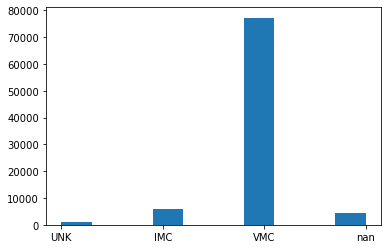

In [ ]:
plt.hist(Qdf2['Weather.Condition'])

Looks like VMC has the most counts.
From googling: 
VMC: Visual Meteorological Conditions. Clear conditions. Visibility more than 5km, min. cloudbase 1500 ft
IMC: Instrument Meteorogical Conditions, is weather that require the use of instruments, typically cloudy or low visibility. These data points seems like extreme weather conditions or unclear conditions.

In [ ]:
Qdf2['Weather.Condition'].isna().sum()

4454

In [ ]:
# I am going to replace NaNs with VMC

In [ ]:
Qdf2.loc[:,'Weather.Condition'] =Qdf2.loc[:,'Weather.Condition'].fillna('VMC')

In [ ]:
Qdf2['Weather.Condition'].isna().sum()

0

Text(0.5, 1.0, 'Weather Conditions with Crashes Counts')

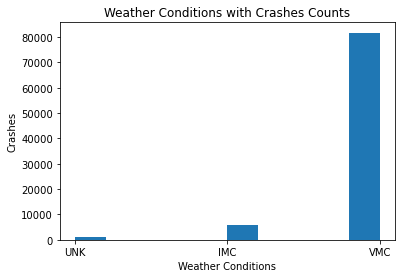

In [ ]:
plt.hist(Qdf2['Weather.Condition'])
plt.xlabel('Weather Conditions')
plt.ylabel('Crashes')
plt.title('Weather Conditions with Crashes Counts')

In [ ]:
Qdf2['Weather.Condition'].value_counts(normalize=True)

VMC    0.920181
IMC    0.067244
UNK    0.012575
Name: Weather.Condition, dtype: float64

Conclusion: 92% of crashes happened under VMC, or clear conditions?

Still not so sure what you can do with this info.

# Purposes of flights and crashes

In [ ]:
Qdf['Purpose.of.flight'].value_counts(normalize=True)

Personal                     0.597942
Instructional                0.128191
Unknown                      0.082252
Aerial Application           0.056979
Business                     0.048587
Positioning                  0.019904
Other Work Use               0.015285
Ferry                        0.009819
Aerial Observation           0.009601
Public Aircraft              0.008706
Executive/corporate          0.006687
Flight Test                  0.004897
Skydiving                    0.002201
External Load                0.001487
Public Aircraft - Federal    0.001270
Banner Tow                   0.001221
Air Race show                0.001197
Public Aircraft - Local      0.000895
Public Aircraft - State      0.000774
Air Race/show                0.000713
Glider Tow                   0.000641
Firefighting                 0.000484
Air Drop                     0.000133
ASHO                         0.000073
PUBS                         0.000048
PUBL                         0.000012
Name: Purpos

In [ ]:
Qdf['Purpose.of.flight'].isna().sum()/len(Qdf['Purpose.of.flight'])

0.08468366759640501

8.5% data points in purpose of flight are NaNs.

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Load the data from 'Aviation_Data.csv' in the data folder into a pandas DataFrame:
Odf = pd.read_csv('data/Aviation_Data.csv')

In [ ]:
# Explore the data by checking the first few rows and getting some basic information:
Odf.head()

In [ ]:
Odf.info()

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Amateur.Built', data=Odf)
plt.xlabel('Amateur Built')
plt.ylabel('Number of Crashes')
plt.title('Frequency of Crashes for Amateur Built Planes')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
counts = Odf['Amateur.Built'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Crashes for Amateur Built Planes')
plt.show()

In [ ]:
Odf2 = Odf.groupby(['Amateur.Built', 'Broad.phase.of.flight']).size().unstack()
Odf2.plot(kind='bar', stacked=True, figsize=(10,8))
plt.xlabel('Amateur Built')
plt.ylabel('Number of Crashes')
plt.title('Frequency of Crashes for Amateur Built Planes by Phase of Flight')
plt.show()


In [ ]:
Odf

In [ ]:
Odf['Engine.Type'].replace(['nan', 'Unknown', 'None', 'NONE', 'UNK'], 'NaN', inplace=True)
pd.value_counts(Odf['Engine.Type']).plot.bar()

In [ ]:
Odf2 = Odf.groupby(['Engine.Type', 'Broad.phase.of.flight']).size().unstack()
Odf2.plot(kind='bar', stacked=True, figsize=(10,8))
plt.xlabel('Engine.Type')
plt.ylabel('Number of Crashes')
plt.title('Frequency of Crashes for Engine Type by Phase of Flight')
plt.show()


In [ ]:
# To answer the first question ("Is there a correlation between the Make/Model of the plane to the number of plane crashes"), we can create a bar chart to visualize the frequency of crashes for each make and model:
Odf2 = Odf.groupby(['Broad.phase.of.flight', 'Aircraft.damage']).size().unstack()
Odf2.plot(kind='bar', stacked=True, figsize=(10,8))
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Crashes')
plt.title('Frequency of Crashes by Phase of Flight and Aircraft Damage')
plt.show()

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
Sdf1 = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')
Sdf1

In [ ]:
Sdf1.dtypes

In [ ]:
Sdf1.columns

In [ ]:
Sdf1.shape

In [ ]:
Sdf1.info()

In [ ]:
aircraft_info = Sdf1.loc[:, ['Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Air.carrier', 'Publication.Date']]
aircraft_info

In [ ]:
# filling empty values
aircraft_info['Engine.Type'].replace(['nan', 'Unknown', 'None', 'NONE', 'UNK'], 'NaN', inplace=True)
aircraft_info.head(20)

In [ ]:
Aircraft_Make=aircraft_info['Make']
MAKE_Uniques=Aircraft_Make.unique()
    
MAKE_Uniques

In [ ]:
# list out an array of ALL makes, lowercase and merge
MAKE_Counts = aircraft_info['Make'].str.lower().value_counts().sort_values()
MAKE_Counts

In [ ]:
MAKE_top_10 = MAKE_Counts.nlargest(10)
MAKE_top_10

In [ ]:
# TOP 10 CARRIERS REPRESENTING CRASHES
TEST_MAKE_to_ints = FreQ10_Engines.copy()
TEST_MAKE_to_ints['Make'] = TEST_MAKE_to_ints['Make'].replace(make_map)
TEST_MAKE_to_ints

In [ ]:
mask = TEST_MAKE_to_ints['Make'].isin([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
TEST_MAKE_to_ints = TEST_MAKE_to_ints.loc[mask]
TEST_MAKE_to_ints.head(20)

In [ ]:
# This make_map store the most common 10 .str values for 'Make', in an integer value
make_map = {'cessna': 0, 'piper': 1, 'beech': 2, 'boeing': 3, 'bell': 4, 'mooney': 5, 'robinson': 6, 'grumman': 7, 'bellanca': 8, 'hughes': 9}
make_map

In [ ]:
FreQ10_Engines=pd.DataFrame(aircraft_info[['Make', 'Number.of.Engines']])
FreQ10_Engines['Make'] = FreQ10_Engines['Make'].str.lower()
FreQ10_Engines

# ENGINES

In [ ]:
AC_engines = aircraft_info["Number.of.Engines"].value_counts()
AC_engines

In [ ]:
Engine_type=aircraft_info['Engine.Type']
Engine_unqiues=Engine_type.unique()
Engine_unqiues

In [ ]:
Engine_COUNTS=Engine_type.value_counts()
Engine_COUNTS

# COMPARING ENGINES COUNT, WITH CRASH PROBABILITY

In [ ]:
# replace the '0.0' values in "Number.of.Engines" with NaN
aircraft_info["Number.of.Engines"].replace({0.0: np.nan}, inplace=True)
aircraft_info

In [ ]:
# store Engine value counts in a new variable, for further processing
AC_engines = aircraft_info["Number.of.Engines"].value_counts()
AC_engines

In [ ]:
# this code block adds all engine value counts, divides each value by the sum, 
# then multiplies by 100, resulting in each values percentage total.
ENG_total = AC_engines.sum()
AC_ENG_percentage =AC_engines / ENG_total * 100
AC_ENG_percentage = AC_ENG_percentage.sort_values()
AC_ENG_percentage

In [ ]:
AC_ENG_percentage.plot(kind="bar")

plt.title("Engine Count and Aviation Safety: A Visual Analysis")
plt.xlabel("Total Engines")
plt.ylabel("Percentage of Total Crashes")

plt.show()

In [ ]:
Sdf11 = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')
Sdf11

In [ ]:
Sdf11.head(15)

In [ ]:
Sdf11.describe()

In [ ]:
SDF =Sdf11.loc[:, ['Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Air.carrier', 'Weather.Condition', 'Publication.Date', 'Broad.phase.of.flight', 'Total.Uninjured', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Location', 'Purpose.of.flight', 'Report.Status', 'Investigation.Type']]
SDF

In [ ]:
# remove '.' delimiters from column titles
for col in SDF.columns:
    if '.' in col:
        new_col = col.replace('.', ' ')
        SDF.rename(columns={col: new_col}, inplace=True)
SDF

In [ ]:
# transform all 'Make' values to lowercase
SDF['Make'] = SDF['Make'].str.lower()
SDF

In [ ]:
# remove NaN values and plot
SDF['Engine Type'].replace(['nan', 'Unknown', 'None', 'NONE', 'UNK'], 'NaN', inplace=True)
pd.value_counts(df['Engine Type']).plot.bar()

In [ ]:
SDF['Total Uninjured'].mean()

In [ ]:
SDF.groupby(['Engine Type', 'Purpose of flight']).mean()

In [ ]:
SDF.groupby(['Model', 'Make']).mean()

In [ ]:
SDF.groupby('Amateur Built').mean('Air carrier')

In [ ]:
# groups engine type by num of engines
SDF.groupby(['Engine Type', 'Number of Engines']).mean()

In [ ]:
# groups engine type by num of engines (BUT ONLY 2 OR MORE)
SDF[SDF['Number of Engines']>2].groupby(['Engine Type', 'Number of Engines']).mean()

In [ ]:
SDF.groupby('Engine Type').max('Number of Engines')

In [ ]:
SDF.groupby('Engine Type').count()

In [ ]:
SDF.groupby('Number of Engines').count()

In [ ]:
SDF.groupby('Model').count()